# Grover's Algorithm

In [12]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text
# import the following operator
from qiskit.quantum_info import Operator
# this is for mct gate
from qiskit.circuit.library import MCMT

In [13]:
U = Operator([[1,0,0,0], [0,-1,0,0], [0,0,1,0], [0,0,0,1]]) #01 is the marked item

In [14]:
print(U)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


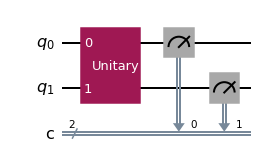

In [15]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

qcirc = QuantumCircuit(qr, cr)

qcirc.append(U, qr)

for i in range(len(qr)):
    qcirc.measure(qr[i], cr[i])
    
qcirc.draw('mpl')

## Unitary box is U operator

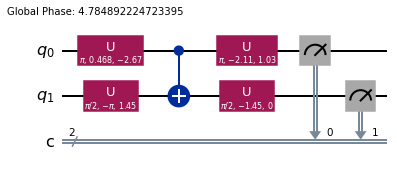

In [16]:
qcirc_decompose = qcirc.decompose()
qcirc_decompose.draw('mpl')

In [17]:
U.is_unitary()

True

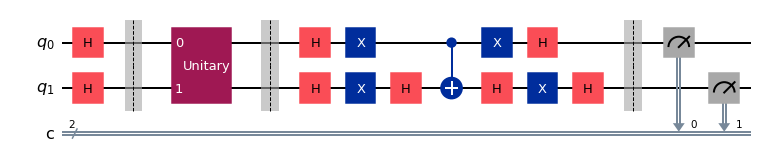

In [34]:
num_qubits = 2

qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')

qcirc = QuantumCircuit(qr, cr)

for i in range(num_qubits):
    qcirc.h(i)    
qcirc.barrier()

# application of the global oracle
qcirc.append(U, qr)
qcirc.barrier()

# implement the diffusion circuit
for qubit in range(num_qubits):
    qcirc.h(qubit)

for qubit in range(num_qubits):
    qcirc.x(qubit)

qcirc.h(num_qubits-1)
qcirc.cx(list(range(num_qubits-1)),num_qubits-1) # mct is multiple control toffoli

# list(range(num_qubits-1)) is control and num_qubits-1 is target
qcirc.h(num_qubits-1)

for qubit in range(num_qubits):
    qcirc.x(qubit)

for qubit in range(num_qubits):
    qcirc.h(qubit)

qcirc.barrier()

qcirc.measure([0,1], [0,1])

qcirc.draw('mpl')

# QASM Simulator


 Total counts are: {'01': 1000}


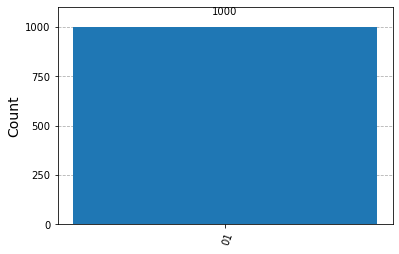

In [24]:
backend = Aer.get_backend('qasm_simulator')

grover_algo = transpile (qcirc, backend)

job = backend.run(grover_algo, shots = 1000)

result = job.result()

counts = result.get_counts(qcirc)

print("\n Total counts are:", counts)

plot_histogram(counts)

In [25]:
# because of the operator 01 is the same as 01 and doesn't need little endian order

In [26]:
U_3 = Operator([[1,0,0,0,0,0,0,0], 
                [0,1,0,0,0,0,0,0], 
                [0,0,1,0,0,0,0,0], 
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,-1,0,0],
                [0,0,0,0,0,0,-1,0],
                [0,0,0,0,0,0,0,1]])

In [27]:
print(U_3)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [28]:
U_3.is_unitary()

True

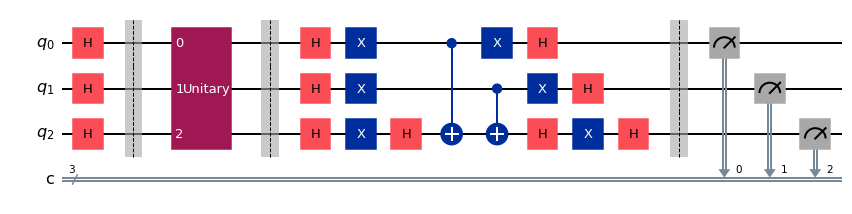

In [30]:
num_qubits = 3

qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')

qcirc = QuantumCircuit(qr, cr)

for i in range(num_qubits):
    qcirc.h(i)    
qcirc.barrier()

# application of the global oracle
qcirc.append(U_3, qr)
qcirc.barrier()

# implement the diffusion circuit
for qubit in range(num_qubits):
    qcirc.h(qubit)

for qubit in range(num_qubits):
    qcirc.x(qubit)

qcirc.h(num_qubits-1)
qcirc.cx(list(range(num_qubits-1)),num_qubits-1) # mct is multiple control toffoli
# the above line is not correct and it should be qcirc.mct

# list(range(num_qubits-1)) is control and num_qubits-1 is target
qcirc.h(num_qubits-1)

for qubit in range(num_qubits):
    qcirc.x(qubit)

for qubit in range(num_qubits):
    qcirc.h(qubit)

qcirc.barrier()

qcirc.measure([0,1,2], [0,1,2])

qcirc.draw('mpl')


 Total counts are: {'001': 114, '011': 143, '101': 127, '110': 144, '000': 85, '010': 122, '111': 136, '100': 129}


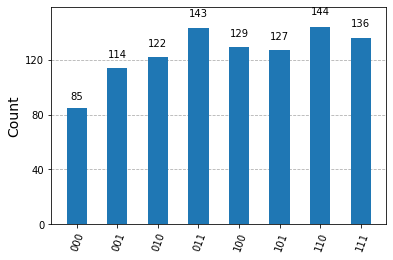

In [32]:
backend = Aer.get_backend('qasm_simulator')

grover_algo = transpile (qcirc, backend)

job = backend.run(grover_algo, shots = 1000)

result = job.result()

counts = result.get_counts(qcirc)

print("\n Total counts are:", counts)

plot_histogram(counts)

In [35]:
# this is not a correct answer because of .mct 